<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import folium

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
house_csv = "Sacramento_transactions.csv"

df = pd.read_csv(house_csv)

In [3]:
# head
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
# tail
df.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [5]:
# check null values
df.isnull().any()

street       False
city         False
zip          False
state        False
beds         False
baths        False
sq__ft       False
type         False
sale_date    False
price        False
latitude     False
longitude    False
dtype: bool

In [6]:
# data types
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [7]:
# zip code is categorical value, change to string
df['zip'] = df.zip.astype(str)

df.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [8]:
# covert sale_date to datetime datatype

df['sale_date']= pd.to_datetime(df['sale_date'])

df.head()

/opt/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768


In [9]:
# extract day from sale_date and save in a new column
df['day'] = df.sale_date.dt.day


In [10]:
# describe data
df.describe()

,beds,baths,sq__ft,price,latitude,longitude,day
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982,18.217259
std,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278,2.131239
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704,15.000000
25%,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127,16.000000
50%,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220,19.000000
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778,20.000000
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599,21.000000


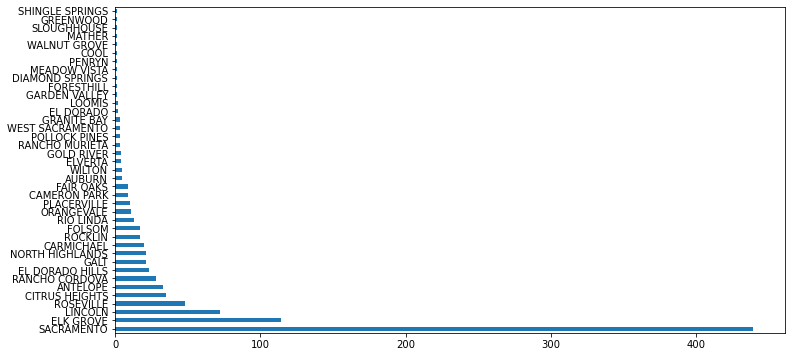

In [11]:
# bar plot of 'city'

city = df.city.value_counts()

city.plot.barh(figsize = (12,6))

In [12]:
# create a new 'type' ('Plot') which have 0 beds
df['type'].value_counts()

plot = df[df.beds == 0]

df.loc[df['beds']==0,'type'] = 'Plot'


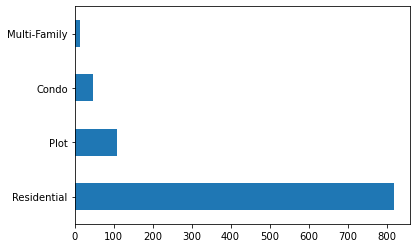

In [13]:
# bar plot 'type' of residence
residence = df['type'].value_counts()

residence.plot.barh()

In [14]:
# Bonus : use folium library to create a base map of Sacramento 
# and add circle/marker for residence locations

base_map = folium.Map(location = [38.575764,-121.4478851], zoom_start = 12, control_scale = True)

for lat, long in zip(df.latitude,df.longitude):
    folium.features.Marker([lat,long], radius =5, color = 'blue').add_to(base_map)
    
display(base_map)

In [15]:
dropped_df = df.drop(df[df['sq__ft']== 0].index)


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [16]:
# ANSWER
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'day'],
      dtype='object')

Price. That is what we want to measure

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [17]:
# ANSWER

Street, city, beds,baths, sq__ft, type, sale_date

#### 2.3 Find correlation between variables

Find correlation between variables. Create scatter plots of potential variables.  Which is the best predictor? Why? State your reason.

In [18]:
# ANSWER
df.corr()

,beds,baths,sq__ft,price,latitude,longitude,day
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993,-0.003317
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582,0.027585
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742,0.052710
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485,0.050196
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925,-0.043809
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000,-0.004985
day,-0.003317,0.027585,0.052710,0.050196,-0.043809,-0.004985,1.000000


In [19]:
dropped_df.corr()

,beds,baths,sq__ft,price,latitude,longitude,day
beds,1.000000,0.654746,0.695710,0.441988,-0.107440,0.056713,0.047372
baths,0.654746,1.000000,0.724631,0.501820,-0.081249,0.108081,0.090159
sq__ft,0.695710,0.724631,1.000000,0.693708,-0.103287,0.135809,0.091621
price,0.441988,0.501820,0.693708,1.000000,0.058475,0.278312,0.106157
latitude,-0.107440,-0.081249,-0.103287,0.058475,1.000000,0.344431,-0.055539
longitude,0.056713,0.108081,0.135809,0.278312,0.344431,1.000000,0.031488
day,0.047372,0.090159,0.091621,0.106157,-0.055539,0.031488,1.000000


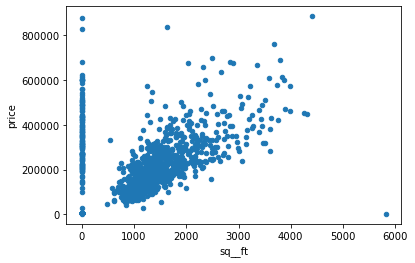

In [20]:
df.plot.scatter(x='sq__ft',y='price')

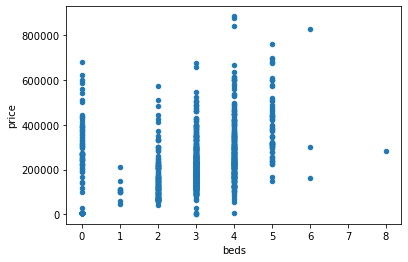

In [21]:
df.plot.scatter(x='beds',y='price')

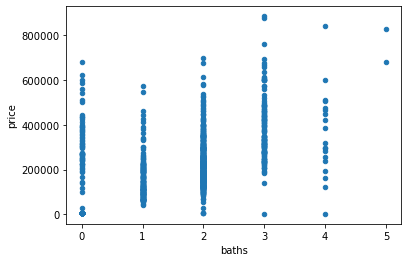

In [22]:
df.plot.scatter(x='baths',y='price')

```Sq__ft``` seems to be the best predictor 

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [23]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [24]:
# ANSWER

X = df['sq__ft'].values.reshape(-1,1)
Y = df['price']

X2 = dropped_df['sq__ft'].values.reshape(-1,1)
Y2 = dropped_df['price']

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [25]:
reg = LinearRegression()
reg.fit(X2,Y2)
reg.score(X2,Y2)

0.4812307133326901

### 3. Splitting Data

In [26]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [27]:
# ANSWER
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X2,Y2,test_size = 0.33, random_state =42)

#### 3.2 Check Shape, Sample of Test Train Data

In [28]:
# ANSWER
## Check training/test data
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(545, 1)

(269, 1)

(545,)

(269,)

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [29]:
# ANSWER
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.49300843934238503

In [30]:
# ANSWER
reg.fit(X_test,y_test)
reg.score(X_test,y_test)

0.45071717296278235

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [31]:
# ANSWER
value = np.array([1204]).reshape(1,-1)

reg.predict(value)

array([177497.47726645])

#### Find the error

In [39]:
# Predict price from X_test (all the datapoints in X_test, find the MSE of X_test)

test_price = reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,test_price)

6854245667.041201



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



